In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle/"

In [4]:
%cd /content/gdrive/My Drive/Kaggle/Books Data with Category Language and Summary

/content/gdrive/My Drive/Kaggle/Books Data with Category Language and Summary


In [5]:
!ls

Preprocessed_data.csv


In [6]:
df = pd.read_csv(os.path.join("Preprocessed_data.csv"))
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [7]:
book_df = pd.DataFrame(df["book_title"])
book_df

,book_title
0,Classical Mythology
1,Clara Callan
2,Clara Callan
3,Clara Callan
4,Clara Callan
...,...
1031170,As Hogan Said . . . : The 389 Best Things Anyo...
1031171,All Elevations Unknown: An Adventure in the He...
1031172,Why stop?: A guide to Texas historical roadsid...
1031173,The Are You Being Served? Stories: 'Camping In...


In [8]:
book_df_groups = df.groupby(['book_title'])
book_df_groups

In [90]:
#Make the book list smaller by looking only at books where 100 people have read them
group_with_one = book_df_groups.count()
group = group_with_one[group_with_one["user_id"] > 556]

In [91]:
group.sort_values(["user_id"], ascending= False)
group.reset_index(level=0, inplace=True)

In [92]:
# for books which over 556 people have read
# 385 is the median number of times a book is bought by our 278,858 users
#User count over 834 (278*3); median number is 1096.5
# 446 is the mean number of times a book is bough by our 278,858 users
group["user_id"].median()

662.0

In [94]:
# Median books: Life of Pi
# for Over 834: The Lovely Bones: A Novel

mean_books = group[group["user_id"] > 662]
mean_books.sort_values(['user_id'], ascending= True)

,book_title,Unnamed: 0,user_id,location,age,isbn,rating,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
6,Life of Pi,664,664,664,664,664,664,664,664,664,664,664,664,664,664,664,657,650,651
1,Angels & Demons,670,670,670,670,670,670,670,670,670,670,670,670,670,670,670,667,663,660
17,The Red Tent (Bestselling Backlist),723,723,723,723,723,723,723,723,723,723,723,723,723,723,723,721,715,693
3,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,740,740,740,740,740,740,740,740,740,740,740,740,740,740,739,731,724
18,The Secret Life of Bees,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,770,762,751
2,Bridget Jones's Diary,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,809,801,788
13,The Nanny Diaries: A Novel,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,822,818,800
0,A Painted House,838,838,838,838,838,838,838,838,838,838,838,838,838,838,838,836,827,808
9,The Da Vinci Code,898,898,898,898,898,898,898,898,898,898,898,898,898,898,898,891,890,882
12,The Lovely Bones: A Novel,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1291,1273,1227


In [95]:
book_list = pd.DataFrame(group["book_title"])
book_list

,book_title
0,A Painted House
1,Angels & Demons
2,Bridget Jones's Diary
3,Divine Secrets of the Ya-Ya Sisterhood: A Novel
4,Harry Potter and the Sorcerer's Stone (Harry P...
5,House of Sand and Fog
6,Life of Pi
7,Snow Falling on Cedars
8,Summer Sisters
9,The Da Vinci Code


Building a Book-User Matrix

In [96]:
model_df = pd.merge(df, book_list, on="book_title")
model_df

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,98,9,"germantown, tennessee, usa",34.7439,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],germantown,tennessee,usa
1,99,243,"arden hills, minnesota, usa",34.7439,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],arden hills,minnesota,usa
2,100,388,"nashville, tennessee, usa",35.0000,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],nashville,tennessee,usa
3,101,2977,"richland, washington, usa",25.0000,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],richland,washington,usa
4,102,3329,"grantsville, utah, usa",34.7439,0440234743,8,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],grantsville,utah,usa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17938,260245,273979,"bloomsburg, pennsylvania, usa",20.0000,0385503822,0,The Summons,John Grisham,2002.0,Doubleday Books,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,"For the first time since A Time to Kill, the a...",en,['Fiction'],bloomsburg,pennsylvania,usa
17939,260246,274549,"san diego, california, usa",34.7439,0385503822,0,The Summons,John Grisham,2002.0,Doubleday Books,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,"For the first time since A Time to Kill, the a...",en,['Fiction'],san diego,california,usa
17940,260247,277114,"jefferson, louisiana, usa",34.7439,0385503822,0,The Summons,John Grisham,2002.0,Doubleday Books,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,http://images.amazon.com/images/P/0385503822.0...,"For the first time since A Time to Kill, the a...",en,['Fiction'],jefferson,louisiana,usa
17941,703644,40415,"san francisco, california, usa",34.0000,0375431977,4,The Summons,John Grisham,2002.0,Random House Large Print Publishing,http://images.amazon.com/images/P/0375431977.0...,http://images.amazon.com/images/P/0375431977.0...,http://images.amazon.com/images/P/0375431977.0...,9,9,9,san francisco,california,usa


In [97]:
user_book_df = model_df.drop(["Unnamed: 0", "location","age", "isbn", "rating", "book_author", "year_of_publication", "publisher", "img_m", "img_l", "img_s", "Summary", "city", "Language","Category", "state", "country"], axis=1)
user_book_df

,user_id,book_title
0,9,The Testament
1,243,The Testament
2,388,The Testament
3,2977,The Testament
4,3329,The Testament
...,...,...
17938,273979,The Summons
17939,274549,The Summons
17940,277114,The Summons
17941,40415,The Summons


In [98]:
user_matrix = pd.get_dummies(user_book_df["book_title"])
user_matrix

,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),House of Sand and Fog,Life of Pi,Snow Falling on Cedars,Summer Sisters,The Da Vinci Code,The Firm,The Girls' Guide to Hunting and Fishing,The Lovely Bones: A Novel,The Nanny Diaries: A Novel,The Notebook,The Pelican Brief,The Pilot's Wife : A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,The Summons,The Testament,Where the Heart Is (Oprah's Book Club (Paperback)),Wild Animus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17939,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [99]:
combined_df = pd.concat([user_book_df,user_matrix], axis=1)
combined_df.drop(['book_title'], axis=1, inplace=True)
combined_df

,user_id,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),House of Sand and Fog,Life of Pi,Snow Falling on Cedars,Summer Sisters,The Da Vinci Code,The Firm,The Girls' Guide to Hunting and Fishing,The Lovely Bones: A Novel,The Nanny Diaries: A Novel,The Notebook,The Pelican Brief,The Pilot's Wife : A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,The Summons,The Testament,Where the Heart Is (Oprah's Book Club (Paperback)),Wild Animus
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17938,273979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17939,274549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17940,277114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17941,40415,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [100]:
groups = combined_df.groupby('user_id')
groups

In [101]:
book_matrix = groups.sum()
book_matrix.head()

,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),House of Sand and Fog,Life of Pi,Snow Falling on Cedars,Summer Sisters,The Da Vinci Code,The Firm,The Girls' Guide to Hunting and Fishing,The Lovely Bones: A Novel,The Nanny Diaries: A Novel,The Notebook,The Pelican Brief,The Pilot's Wife : A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,The Summons,The Testament,Where the Heart Is (Oprah's Book Club (Paperback)),Wild Animus
user_id,,,,,,,,,,,,,,,,,,,,,,,
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
114,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
232,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
book_matrix.reset_index(level=0, inplace=True)



In [103]:
book_matrix.drop(['user_id'], axis=1, inplace=True)
book_matrix

,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),House of Sand and Fog,Life of Pi,Snow Falling on Cedars,Summer Sisters,The Da Vinci Code,The Firm,The Girls' Guide to Hunting and Fishing,The Lovely Bones: A Novel,The Nanny Diaries: A Novel,The Notebook,The Pelican Brief,The Pilot's Wife : A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,The Summons,The Testament,Where the Heart Is (Oprah's Book Club (Paperback)),Wild Animus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
10021,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10022,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
10023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [104]:
#556: Life of Pi
#834: The Lovely Bones: A Novel
y = book_matrix["Life of Pi"]
y

0        0
1        0
2        0
3        0
4        0
        ..
10020    0
10021    0
10022    0
10023    0
10024    0
Name: Life of Pi, Length: 10025, dtype: uint8

In [105]:
X = book_matrix.drop("Life of Pi", axis=1)
X.head()

,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),House of Sand and Fog,Snow Falling on Cedars,Summer Sisters,The Da Vinci Code,The Firm,The Girls' Guide to Hunting and Fishing,The Lovely Bones: A Novel,The Nanny Diaries: A Novel,The Notebook,The Pelican Brief,The Pilot's Wife : A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,The Summons,The Testament,Where the Heart Is (Oprah's Book Club (Paperback)),Wild Animus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [107]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [108]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.977/0.944
k: 3, Train/Test Score: 0.966/0.949
k: 5, Train/Test Score: 0.963/0.952
k: 7, Train/Test Score: 0.961/0.953
k: 9, Train/Test Score: 0.960/0.953
k: 11, Train/Test Score: 0.960/0.953
k: 13, Train/Test Score: 0.960/0.954
k: 15, Train/Test Score: 0.960/0.954
k: 17, Train/Test Score: 0.960/0.954
k: 19, Train/Test Score: 0.960/0.954
k: 21, Train/Test Score: 0.959/0.954
k: 23, Train/Test Score: 0.960/0.954
k: 25, Train/Test Score: 0.960/0.954
k: 27, Train/Test Score: 0.960/0.954
k: 29, Train/Test Score: 0.960/0.954


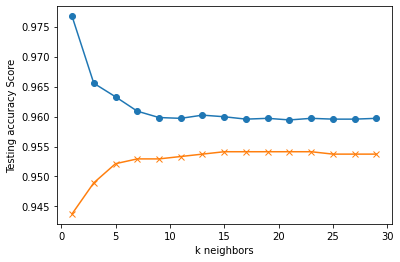

In [109]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [131]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.954


In [139]:
# 834; new_book_data = [[1,0,0]]
# with the 22 books training to predict Life of Pi. If I buy Wild Animus and nothing else, it is predicted that I will not buy Life of Pi
# Nothing -- buy 
# Buy (just one variable): [nothing bought yet; A Painted House; Angels & Demons; Bridget Jones's Diary; Divine Secrets of the Ya-Ya Sisterhood: A Novel; ...
#                              Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)); House of Sand and Fog; Snow Falling on Cedars; Summer Sisters; The Da Vinci Code; The Firm; ...
#                              The Girls' Guide to Hunting and Fishing; The Lovely Bones: A Novel; The Nanny Diaries: A Novel; The Notebook; The Red Tent (Bestselling Backlist); The Secret Life of Bees; The Summons; The Testament; ...
#                              Where the Heart Is (Oprah's Book Club (Paperback))]
# Won't buy (just one variable): [Wild Animus]
new_book_data = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]]
predicted_class = knn.predict(new_book_data)
print(predicted_class)

[1]
